## Convolutional Neural Networks:

## Model

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D

Using TensorFlow backend.


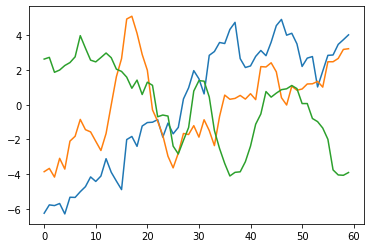

N_train= 8000  N_val= 2000  L= 60  n_class= 3


In [2]:
str0 = 'ts_L60_Z12_A500_DX50_bias5_N10000.csv'
fnamex = 'DATA/x_' + str0
fnamey = 'DATA/y_' + str0

x = np.loadtxt(fnamex, delimiter=',', dtype=float)
N = len(x)

xm = x.mean(axis=1)
for i in range(N):
    x[i] = x[i]-xm[i]

x = x/100     # dividing by the variance

plt.plot(x[0])
plt.plot(x[1])
plt.plot(x[2])
plt.show()

categ = np.loadtxt(fnamey, delimiter=',', dtype=int)
n_class = 3

y = np.zeros((N,n_class))
for i in range(N): 
    y[i][categ[i]] = 1.

perc_train = 0.8
N_train = int(N*perc_train)

x_train = x[:N_train]
y_train = y[:N_train]
x_val = x[N_train:]
y_val = y[N_train:]
N_val = len(y_val)

L = len(x[0])
print('N_train=', N_train, ' N_val=', N_val, ' L=', L, ' n_class=', n_class)

## Data reshaping

In [3]:
x_train = x_train.reshape(x_train.shape[0],L,1)
x_val = x_val.reshape(x_val.shape[0],L,1)
input_shape = (L,1)

## Convolutional NN

In [4]:
from keras import initializers, regularizers

reg = keras.regularizers.l1(0.1)

ini = keras.initializers.RandomNormal(mean=0,stddev=0.05,seed=12345)
NCONV = 1

model = Sequential()
if NCONV == 1:
    model.add(Conv1D(filters=5, kernel_size=11, 
                     kernel_regularizer=reg,
                     kernel_initializer=ini, 
                     activation='relu', input_shape=input_shape))
    model.add(AveragePooling1D(5))
    model.add(Conv1D(filters=5, kernel_size=7, activation='relu'))
    model.add(Flatten())
    model.add(Dense(10, activation='relu'))
    model.add(Dropout(0.2))
model.add(Dense(n_class, activation='softmax'))
              
print(model.summary())

from keras import optimizers
opt = optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True, decay=1e-6)
#opt = optimizers.RMSprop()
#opt = optimizers.Adam()
#opt = optimizers.Nadam()

# model: categorical
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=opt, metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_1 (Average (None, 10, 5)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 4, 5)              180       
_________________________________________________________________
flatten_1 (Flatten)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                

## Convolutional NN: fit

In [5]:
batch_size = 250
epochs = 100

fit = model.fit(x_train, y_train,
               batch_size=batch_size, epochs=epochs,
               validation_data=(x_val,y_val),
               verbose=2, shuffle=True)

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
 - 0s - loss: 1.1723 - accuracy: 0.3361 - val_loss: 1.1041 - val_accuracy: 0.3330
Epoch 2/100
 - 0s - loss: 1.1037 - accuracy: 0.3334 - val_loss: 1.1041 - val_accuracy: 0.3330
Epoch 3/100
 - 0s - loss: 1.1036 - accuracy: 0.3318 - val_loss: 1.1039 - val_accuracy: 0.3665
Epoch 4/100
 - 0s - loss: 1.1036 - accuracy: 0.3377 - val_loss: 1.1035 - val_accuracy: 0.3400
Epoch 5/100
 - 0s - loss: 1.1037 - accuracy: 0.3262 - val_loss: 1.1033 - val_accuracy: 0.3255
Epoch 6/100
 - 0s - loss: 1.1035 - accuracy: 0.3350 - val_loss: 1.1030 - val_accuracy: 0.3760
Epoch 7/100
 - 0s - loss: 1.1035 - accuracy: 0.3318 - val_loss: 1.1034 - val_accuracy: 0.3335
Epoch 8/100
 - 0s - loss: 1.1035 - accuracy: 0.3305 - val_loss: 1.1034 - val_accuracy: 0.3330
Epoch 9/100
 - 0s - loss: 1.1035 - accuracy: 0.3334 - val_loss: 1.1040 - val_accuracy: 0.3430
Epoch 10/100
 - 0s - loss: 1.1036 - accuracy: 0.3339 - val_loss: 1.1034 - val_accuracy: 0.3590
Epoch 11/10

Epoch 87/100
 - 0s - loss: 0.8798 - accuracy: 0.6774 - val_loss: 0.8209 - val_accuracy: 0.7390
Epoch 88/100
 - 0s - loss: 0.8499 - accuracy: 0.6950 - val_loss: 0.7917 - val_accuracy: 0.7560
Epoch 89/100
 - 0s - loss: 0.8528 - accuracy: 0.6888 - val_loss: 0.7874 - val_accuracy: 0.7465
Epoch 90/100
 - 0s - loss: 0.8368 - accuracy: 0.6964 - val_loss: 0.8317 - val_accuracy: 0.7180
Epoch 91/100
 - 0s - loss: 0.8375 - accuracy: 0.6961 - val_loss: 0.7904 - val_accuracy: 0.7450
Epoch 92/100
 - 0s - loss: 0.8280 - accuracy: 0.7026 - val_loss: 0.8217 - val_accuracy: 0.7175
Epoch 93/100
 - 0s - loss: 0.8143 - accuracy: 0.7120 - val_loss: 0.7934 - val_accuracy: 0.7395
Epoch 94/100
 - 0s - loss: 0.7998 - accuracy: 0.7179 - val_loss: 0.7639 - val_accuracy: 0.7450
Epoch 95/100
 - 0s - loss: 0.8423 - accuracy: 0.7040 - val_loss: 0.7418 - val_accuracy: 0.7780
Epoch 96/100
 - 0s - loss: 0.8056 - accuracy: 0.7201 - val_loss: 0.7683 - val_accuracy: 0.7460
Epoch 97/100
 - 0s - loss: 0.7880 - accuracy: 0.72

Confusion matrix of the model: 
 [[581  53  33]
 [140 450  76]
 [120  69 478]]


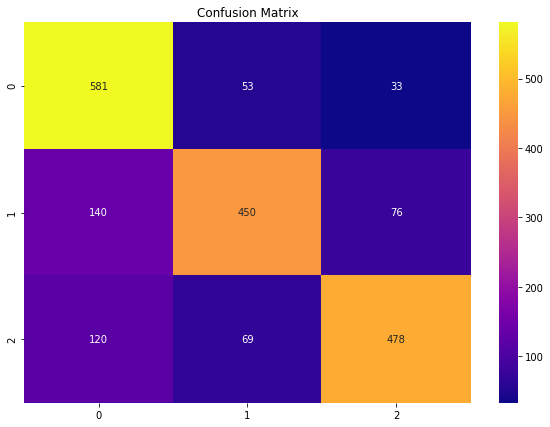

In [118]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

def maplabels(l):
    if   (l == [1,0,0]).all(): return 0
    elif (l == [0,1,0]).all(): return 1
    elif (l == [0,0,1]).all(): return 2
    else: print("Error", l)
    return


#Confusion Matrix
np.set_printoptions(precision=2, suppress=True) 

labels = np.apply_along_axis(maplabels,1,y_val)
model_y = np.around(model.predict(x_val)).astype('int')
predictions = model.predict(x_val).argmax(axis=-1)

conf_mat = confusion_matrix(labels,predictions)
print("Confusion matrix of the model: \n", conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [0,1,2], columns = [0,1,2])
plt.figure(figsize = (10,7))
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True, cmap="plasma", fmt="d")
plt.show()

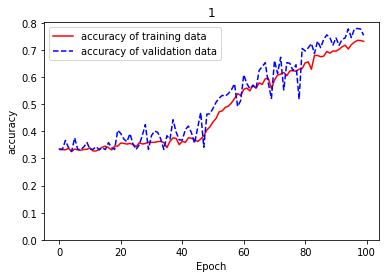

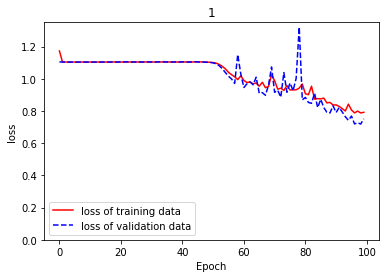

In [6]:
for obs in ('accuracy', 'loss'):
    plt.figure(figsize=(6,4))
    plt.plot(fit.history[obs], 'r',
            label=obs+' of training data')
    plt.plot(fit.history['val_'+obs], 'b--',
            label=obs+' of validation data') 
    plt.title(NCONV)
    plt.ylabel(obs)
    plt.xlabel('Epoch')
    plt.legend()
    plt.ylim(0)
    plt.show()

## Plot the weights of the filters in the first layer

w0T= [[[ 8.5669465e-04 -8.3971035e-04  1.9614927e-03  3.7914224e-04
    9.6138415e-04 -7.8518095e-04  1.0948402e-03  1.6701419e-04
   -5.1275361e-04  1.3831588e-03  7.8687049e-04]]

 [[ 9.4183721e-04 -5.4552592e-04  7.5264979e-04  1.0203305e-03
   -5.8850832e-04 -1.7369736e-04 -9.0222131e-04  1.4542073e-03
   -2.2825028e-05  1.0957675e-03  7.5499725e-04]]

 [[-5.9888777e-03  1.2726483e-02  2.0413813e-01  4.6519466e-02
   -1.1178574e-03 -3.0644534e-03 -5.9792036e-03 -3.2528732e-02
   -2.2899997e-01 -3.1895760e-02 -2.2219890e-03]]

 [[-5.1367865e-04 -1.7669324e-03 -1.9605539e-04  9.2293508e-04
   -4.8026047e-04 -5.6267984e-04  6.9325592e-04 -1.5551276e-03
    7.2864169e-04  1.7849833e-04 -8.6413190e-04]]

 [[ 1.3388287e-02 -5.8840215e-04 -1.3243385e-01 -1.4800593e-01
   -6.7318818e-03  1.9401315e-03 -6.5133662e-04  1.1332983e-03
    2.4661544e-01  3.1258836e-02  1.9655585e-02]]]
w01= [-0.0606056  -0.0568921  -0.37100857 -0.06200481 -0.6138289 ]
11
5


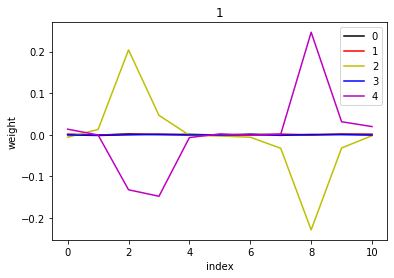

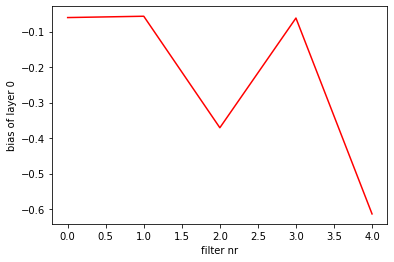

[-0.0606056  -0.0568921  -0.37100857 -0.06200481 -0.6138289 ]


In [7]:
c = ['k','r','y','b','m']
def plot_w(w):
    #Plot weights of convol. layer
    plt.figure(figsize=(6,4))
    for i in range(len(w)):
        plt.plot(w[i][0],c[i],label=str(i))
    plt.title(NCONV)
    plt.ylabel('weight')
    plt.xlabel('index')
    plt.legend()
    plt.show()
    
w0 = model.layers[0].get_weights()[0]    # weight
w01 = model.layers[0].get_weights()[1]   # bias
w0T = w0.T
print('w0T=',w0T)
print('w01=',w01)
print(len(w0))
print(len(w0T))
plot_w(w0T)

plt.plot(w01, 'r', label=str(i))
plt.ylabel('bias of layer 0')
plt.xlabel('filter nr')
plt.show()
print(w01)